# Netflix Movies and TV Shows

The dataset was downloaded from [kaggle](https://www.kaggle.com/shivamb/netflix-shows).

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Some of the interesting [questions](https://www.kaggle.com/shivamb/netflix-shows) which can be performed on this dataset:

1. Is Netflix has increasingly focusing on TV rather than movies in recent years.
2. Understanding what content is available in different countries.
3. Identifying similar content by matching text-based features.
4. Genre content analysis.

In [241]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib inline
import matplotlib.pyplot as plt

In [242]:
nt_df = pd.read_csv('data/netflix_titles.csv')
nt_df.shape

(6234, 12)

In [243]:
nt_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [244]:
nt_df['date_added'] = pd.to_datetime(nt_df['date_added'])
# nt_df.head()
nt_df.shape

(6234, 12)

In [245]:
def collect_statistics_by_type(df):
    types = {}
    for t in set(df.type):
        types.update({t: len(df[df.type == t])})
    return types

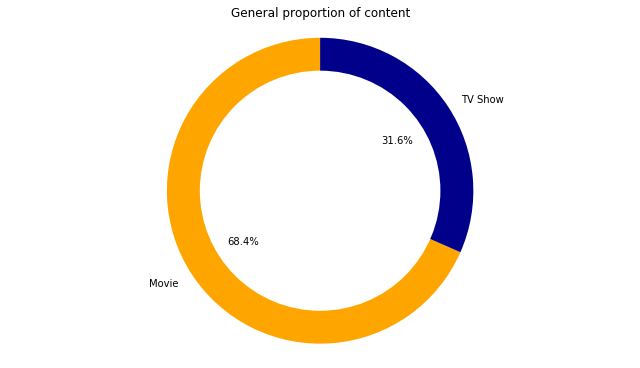

In [246]:
# Understanding what content is available in different countries
stat_by_type = collect_statistics_by_type(nt_df)

#colors
colors = ['orange','darkblue']


#draw circle
centre_circle = plt.Circle((0,0), 0.785, fc='white')

fig = plt.gcf()
fig.set_size_inches(9, 5, forward=False)
fig.gca().add_artist(centre_circle)
plt.pie(stat_by_type.values(), colors=colors, labels=stat_by_type.keys(), 
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.title("General proportion of content")
plt.show()

### Visualizing content trends with years

In [247]:
trends_df = pd.DataFrame()

# show statistics for the 30 years
trends_df['year'] = np.sort(nt_df[nt_df.date_added.dt.year >= 1990].date_added.dt.year.unique())
movie_count = []
tv_count = []

for y in trends_df['year']:
    movie_count.append(len(nt_df[(nt_df.date_added.dt.year == y) & (nt_df.type == 'Movie')]))
    tv_count.append(len(nt_df[(nt_df.date_added.dt.year == y) & (nt_df.type == 'TV Show')]))

trends_df['movie_count'] = np.array(movie_count)
trends_df['tv_count'] = np.array(tv_count)
trends_df.head()

,year,movie_count,tv_count
0,2008,1,1
1,2009,2,0
2,2010,1,0
3,2011,13,0
4,2012,4,3


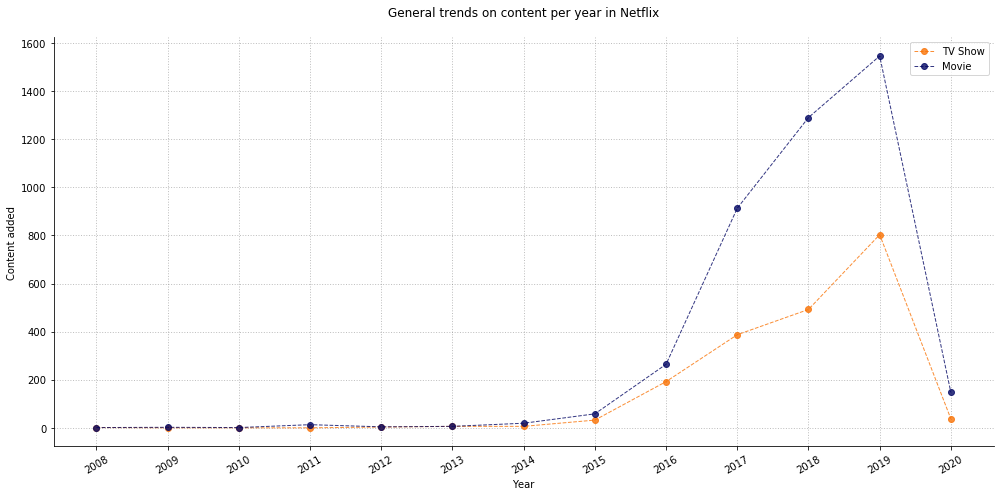

In [248]:
plt.figure(figsize=(14, 7))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Content added')
plt.xticks(np.arange(trends_df['year'].min(), trends_df['year'].max()+1, step=1), rotation=30)
plt.grid(b=True, color='gray', alpha=0.5, linestyle='dotted', linewidth=1)

plt.plot(trends_df['year'], trends_df['tv_count'], label="TV Show", color='xkcd:orange', ls='--', 
         alpha=0.8, marker='o', linewidth=1)
plt.plot(trends_df['year'], trends_df['movie_count'], label="Movie", color='xkcd:darkblue', ls='--',
         alpha=0.8, marker='o', linewidth=1)

plt.title('General trends on content per year in Netflix\n')
plt.legend()
plt.tight_layout()

plt.show()

The plot above demonstrates that **for the last decade Netflix has been focusing on enriching its database with mostly with movies**, as the number of movies increases more, than the number of TV Shows.

### Annual growth of content

One more interesting issue is to analyze what is the annual growth for both __Movies__ and __TV Shows__

In [249]:
# analysis of annual growth of content for 2000-2020
growth_df = pd.DataFrame()

# show statistics for the 30 years
growth_df['year'] = np.sort(nt_df[nt_df.date_added.dt.year >= 2000].date_added.dt.year.unique())
movie_count = []
tv_count = []

for y in trends_df['year']:
    movie_count.append(len(nt_df[(nt_df.date_added.dt.year < y) & (nt_df.type == 'Movie')]))
    tv_count.append(len(nt_df[(nt_df.date_added.dt.year < y) & (nt_df.type == 'TV Show')]))

growth_df['movie_count'] = np.array(movie_count)
growth_df['tv_count'] = np.array(tv_count)
# growth_df.head()

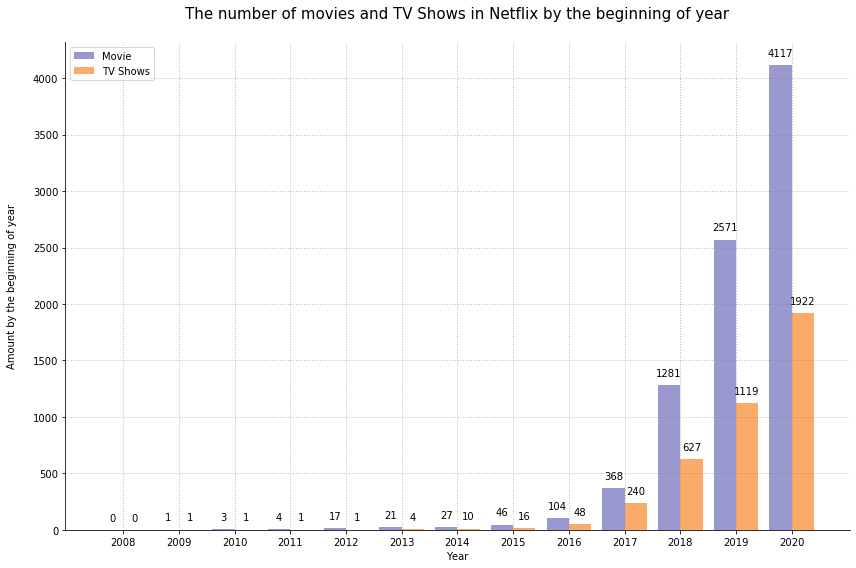

In [250]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),   # to int fopm float 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 7),  # 10 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

diff_df = growth_df

labels = growth_df['year']
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
fig.gca().spines['top'].set_visible(False)
fig.gca().spines['right'].set_visible(False)

fig.gca().set_xlabel('Year')
# fig.gca().set_ylabel('Amount by the beginning of year')

ax.grid(b=True, color='gray', alpha=0.5, linestyle='dotted', linewidth=1)

movie_rect = ax.bar(x - width/2, growth_df['movie_count'],
                    width, label='Movie', color='darkblue', alpha=0.4)
tv_rect = ax.bar(x + width/2, growth_df['tv_count'],
                 width, label='TV Shows', color='xkcd:orange', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount by the beginning of year\n')
ax.set_title('The number of movies and TV Shows in Netflix by the beginning of year\n', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(movie_rect)
autolabel(tv_rect)

plt.legend()
fig.tight_layout()

plt.show()

### Presenting the content amount according to release years

Collecting the content released in decades during 80 years, i.e. 1940-2019.

In [251]:
start_y = 1940
end_y = 2020
periods = np.arange(start_y, end_y + 1, step=10)

decades_labels = []
released_movies = []
released_tv = []

# number of all Movies anf TV Shows for 80 years
period_mask = (nt_df.release_year >= start_y) & (nt_df.release_year <= end_y)
movies_num = nt_df[period_mask & (nt_df.type=='Movie')].__len__()
tv_num = nt_df[period_mask & (nt_df.type=='TV Show')].__len__()

for i in range(len(periods)-1):
    period_mask = (nt_df.release_year >= periods[i]) & (nt_df.release_year <= periods[i+1] - 1)
    released_movies.append(len(nt_df[period_mask & (nt_df.type == 'Movie')]) / movies_num)
    released_tv.append(len(nt_df[period_mask & (nt_df.type == 'TV Show')]) / tv_num)
    decades_labels.append(str(periods[i]) + '-' + str(periods[i+1]-1))
    
released_movies = np.array(released_movies) * 100      # percentage from all movies during period
released_tv = np.array(released_tv) * 100     # percentage from all TV Shows during period

print("Movies: ", movies_num, "TV Shows: ", tv_num)   
decades_labels

Movies:  4265 TV Shows:  1968


['1940-1949',
 '1950-1959',
 '1960-1969',
 '1970-1979',
 '1980-1989',
 '1990-1999',
 '2000-2009',
 '2010-2019']

In [252]:
release_year_df = pd.DataFrame({'period': decades_labels,
                                'movie_count': released_movies,
                                'tv_count': released_tv})

release_year_df

,period,movie_count,tv_count
0,1940-1949,0.328253,0.050813
1,1950-1959,0.140680,0.000000
2,1960-1969,0.422040,0.152439
3,1970-1979,1.219226,0.203252
4,1980-1989,1.922626,0.355691
5,1990-1999,3.868699,1.321138
6,2000-2009,12.004689,5.741870
7,2010-2019,79.953107,91.209350


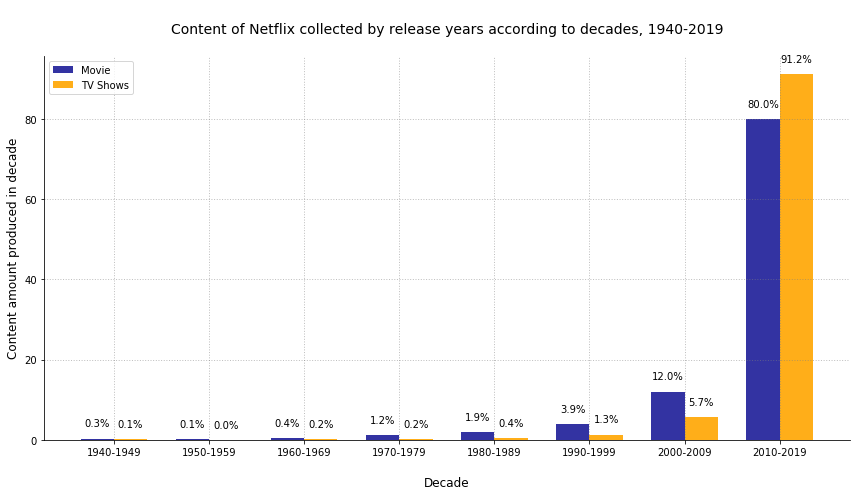

In [253]:
# visualizing results

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),  # 10 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

labels = release_year_df['period']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12, 7, forward=True)
fig.gca().spines['top'].set_visible(False)
fig.gca().spines['right'].set_visible(False)

fig.gca().set_xlabel('\nDecade', fontsize=12)

ax.grid(b=True, color='gray', alpha=0.5, linestyle='dotted', linewidth=1)

movie_rect = ax.bar(x - width/2, np.round(release_year_df['movie_count'], 1), 
                    width, label='Movie', color='darkblue', alpha=0.8)
tv_rect = ax.bar(x + width/2, np.round(release_year_df['tv_count'], 1),
                 width, label='TV Shows', color='orange', alpha=0.9)

ax.set_ylabel('Content amount produced in decade', fontsize=12)
ax.set_title('\nContent of Netflix collected by release years according to decades, ' + str(min(periods)) + '-' + str(max(periods) - 1) + '\n', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)
ax.legend()

autolabel(movie_rect)
autolabel(tv_rect)

fig.tight_layout()
plt.legend()

plt.show()

The bar chart above shows that most of content was produced during the last decade. It means that the __movies and TV Shows of the last century are not relevant in Netflix__. According to the chart, more than 91% of TV Shows  were produced in 2010-2019. <center>$Percentage=\frac{decade\_content\_amount}{all\_content\_amount}$</center>

## Content rating analysis

As the plot above shows, the number of movies in Netflix base has always been more than the number of TV Shows.

The issue is to analyze, content of which age group is more relevant in Netflix's database. According to [Google](https://support.google.com/moviestvpartners/answer/6318206?hl=en):


System|Rating value as appears on store|Rating value for metadata|Description|
------|--------------------------------|-------------------------|-----------|
TV_PG|TV-Y|TV-Y|All Children|
|    TV-Y7|TV-Y7|Directed to Older Children|
|    TV-Y7-FV|TV-Y7-FV|Directed to Older Children - Fantasy Violence|
|    TV-G|TV-G|General Audience|
|    TV-PG|TV-PG|Parental Guidance Suggested|
|    TV-14|TV-14|Parents Strongly Cautioned|
|    TV-MA|TV-MA|Mature Audience Only|

In [254]:
# how many unique rating values Netflix DB
rating_cat = nt_df.rating.unique()
print("Unique rating categories: ", rating_cat.__len__())
rating_cat

Unique rating categories:  15


array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [255]:
rating_df = pd.DataFrame({'cat': rating_cat,
                          'movie_amount': 0,
                          'tv_amount': 0,
                          'overall': 0})
rating_df = rating_df.dropna()    # all rating except for NaN
# rating_df.head()

In [256]:
# show statistics for the all rating types
for cat in rating_df['cat']:
    movies = len(nt_df[(nt_df.rating==cat) & (nt_df.type=='Movie')])
    tvs = len(nt_df[(nt_df.rating==cat) & (nt_df.type=='TV Show')])
    rating_df.loc[rating_df.cat == cat, ['movie_amount']] = movies
    rating_df.loc[rating_df.cat == cat, ['tv_amount']] = tvs
    rating_df.loc[rating_df.cat == cat, ['overall']] = movies + tvs

rating_df = rating_df.sort_values(by=['overall'], ascending=True)
rating_df.head()

,cat,movie_amount,tv_amount,overall
14,NC-17,2,0,2
13,UR,7,0,7
11,G,36,1,37
2,TV-Y7-FV,27,68,95
6,TV-Y,41,102,143


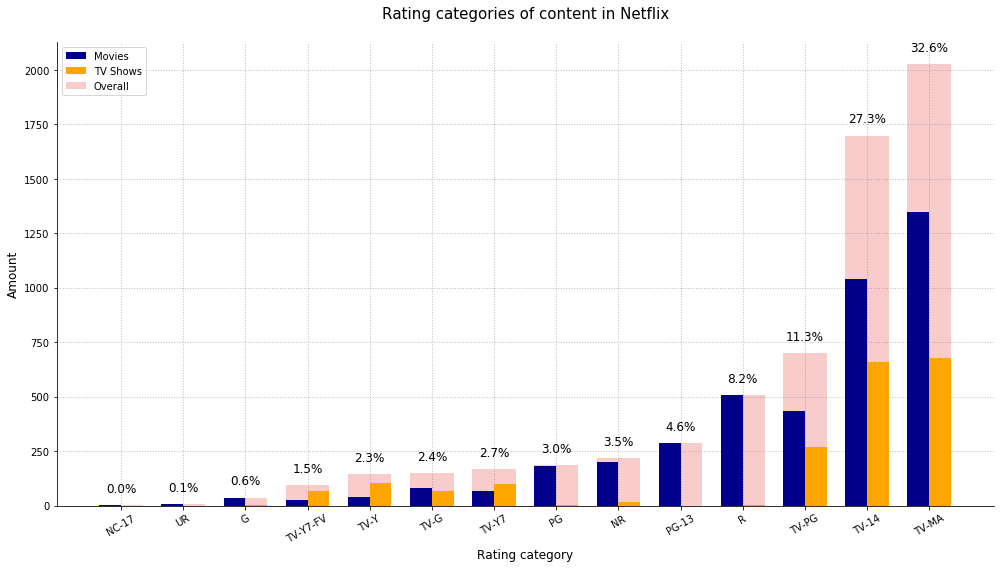

In [257]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height / rating_df.overall.sum() * 100),   # to int fopm float 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),  # 10 points vertical offset
                    textcoords="offset points", fontsize=12,
                    ha='center', va='bottom')

labels = rating_df['cat']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(14, 8, forward=True)
fig.gca().spines['top'].set_visible(False)
fig.gca().spines['right'].set_visible(False)

fig.gca().set_xlabel('Rating category', fontsize=12)
fig.gca().set_ylabel('Amount', fontsize=12)

ax.grid(b=True, color='gray', alpha=0.5, linestyle='dotted', linewidth=1)

movie_rect = ax.bar(x - width/2, rating_df['movie_amount'], width, 
                    label='Movies', color='darkblue', alpha=1.0, zorder=2)
tv_rect = ax.bar(x + width/2, rating_df['tv_amount'], width,
                 label='TV Shows', color='orange', alpha=1.0, zorder=2)

# overall bar chart - annotate amount in percent
overall_rect = ax.bar(x, rating_df['overall'], 2*width, 
                      label='Overall', color='xkcd:red', alpha=0.2, zorder=1)

# ax.plot(labels, rating_df['overall'], label="Overall", 
#         color='xkcd:red', ls='dashed', marker='o', linewidth=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rating categories of content in Netflix\n', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# autolabel(movie_rect)
# autolabel(tv_rect)
autolabel(overall_rect)

plt.legend()
fig.tight_layout()

plt.show()

The bar chart of rating demonstrates that almost 33% of all content belongs to rating category of __Mature Audience Only
(+17)__. 

### Content rating analysis

In [258]:
rating_set = set()
rating_list = nt_df.listed_in.unique()

for g in rating_list:
    if type(g) == str:
        for item in g.split(','):
            item = item.strip()
            if len(item) > 0:
                rating_set.add(item)
print("Unique rating type: ", rating_set.__len__())

TypeError: 'str' object is not callable

In [259]:
countries_set = set()
countries_list = nt_df.country.unique()

for clist in countries_list:
    if type(clist) == str:
        for item in clist.split(','):
            item = item.strip()
            if len(item) > 0:
                countries_set.add(item)
print("Unique countries: ", countries_set.__len__())

TypeError: 'str' object is not callable

In [260]:
cols = list(['country']) + rating_df.cat.tolist()

content_av_df = pd.DataFrame(columns=cols)
content_av_df['country'] = list(countries_set)
content_av_df['overall'] = 0

In [261]:
for country in content_av_df.country.tolist():
    for cat in rating_df.cat.tolist():
        mask = (nt_df.country.str.contains(country)) & (nt_df['rating'] == cat)
        content_av_df.loc[content_av_df.country == country, [cat]] = len(nt_df[mask])

In [262]:
content_av_df.head()

,country,NC-17,UR,G,TV-Y7-FV,TV-Y,TV-G,TV-Y7,PG,NR,PG-13,R,TV-PG,TV-14,TV-MA,overall


Top 10 countries producing content in Netflix sorted in descending order.

In [263]:
content_av_df['overall'] = content_av_df[rating_df.cat.tolist()].sum(axis=1)
content_av_df = content_av_df.sort_values(by=['overall'], ascending=False).reset_index(drop=True)
final_df = content_av_df.copy().set_index('country').drop(['overall'], axis=1)[:10]
final_df

,NC-17,UR,G,TV-Y7-FV,TV-Y,TV-G,TV-Y7,PG,NR,PG-13,R,TV-PG,TV-14,TV-MA
country,,,,,,,,,,,,,,


In [264]:
# according to https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.0f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

C:\Users\Ildar Mukhamedjanov\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  # Remove the CWD from sys.path while we load stuff.


ValueError: zero-size array to reduction operation maximum which has no identity

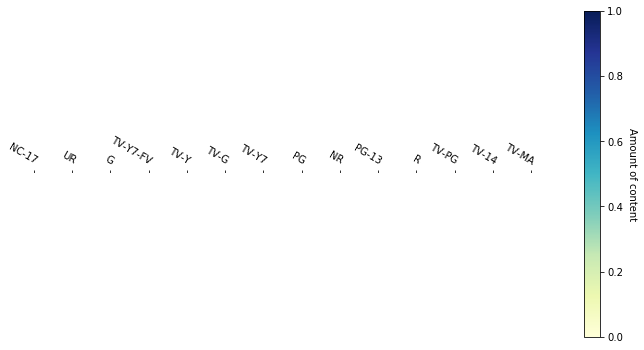

In [265]:
# heatmap from top 10 countries

fig, ax = plt.subplots()
fig.set_size_inches(12, 6, forward=True)

im, cbar = heatmap(final_df.astype(float), final_df.index, final_df.columns, ax=ax,
                   cmap="YlGnBu", cbarlabel="Amount of content")
texts = annotate_heatmap(im, valfmt="{x:.0f}")

fig.tight_layout()
plt.show()

## Performing the most frequency words in descriptions of TV Shows and Movies in Netflix

We will generate a word cloud using __wordcloud__ package. The result image helps to understand what are the most common words used in description and estimate it for both shows types. We should also exclude stopwords from the worldcloud

In [266]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

from nltk.corpus import stopwords as nltk_sw

# collecting all possible stopwords
nltk_stopwords = set(nltk_sw.words('english'))
stopwords = set(STOPWORDS)
stopwords = stopwords.union(nltk_stopwords)
stopwords = stopwords.union(ENGLISH_STOP_WORDS.union(['book']))

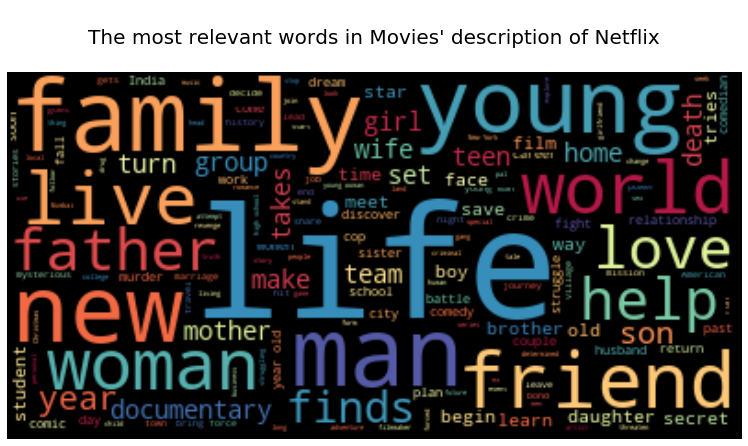

In [267]:
data = nt_df[nt_df.type=='Movie']['description'].values
text = str().join(data)

wordcloud = WordCloud(background_color='black', 
                      colormap='Spectral', stopwords=stopwords, margin=5).generate(text)

fig, ax = plt.subplots()
fig.set_size_inches(12, 6, forward=True)

plt.axis('off')
plt.title("\nThe most relevant words in Movies' description of Netflix\n", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)

plt.show()

Top 50 words in decription of Netflix movies are perfomed in the wordcloud above. So,  the most relevant and commmon are, for example __life, young, man, new, family, friend, woman, world, father, documentary, love__. Top list of 10 words sorted in descending order by weights is performed in the table below.

In [268]:
# save descriptions as the collections of the document
import shutil

def RemoveDir(path):
    if os.path.exists(_dir):
        shutil.rmtree(_dir)

In [269]:
_dir = './tmp_descr/movie'
RemoveDir(_dir)
os.makedirs(_dir)

In [270]:
# generating files
fname_list = []
for i in range(len(nt_df[nt_df.type == 'Movie'])):
    row = nt_df.iloc[i]
    fname = _dir + "/" + str(row["show_id"]) + ".txt"
    fname_list.append(fname)
    text_file = open(fname, "w", encoding="utf-8")
    text_file.write(row["description"])
    text_file.close()

In [271]:
# comparing wordcloud to scikit-learn tf-idf algorithm
def description_scoring(fname_list):
    tfidf = TfidfVectorizer(input='filename', stop_words=stopwords, # use_idf=False,
                            token_pattern=r'\b[^\d\W]+\b')   # excluding numbers

    tfidf_matrix = tfidf.fit_transform(fname_list)
    feature_names = tfidf.get_feature_names()

    terms, scores = [], []
    terms_occurency = {}

    # initially none of the description contains words from feature_names
    for term in feature_names:
        terms_occurency.update({term: 0})

    for doc in range(len(fname_list)):
        feature_index = tfidf_matrix[doc,:].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])

        # counting document the word contains in
        for i in feature_index:
            terms_occurency[feature_names[i]] += 1
        for t, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
            terms.append(t)
            scores.append(s)


    df = pd.DataFrame({'word': terms,
                       'score': scores,
                       'contains_in': 0})
    df = df.sort_values(by='score', ascending=True)
    df['score'] = df.groupby(['word'])['score'].transform('sum')
    
    # normalizing score column
    df['score'] = df['score'] / df['score'].max()

    
    df = df[~df.word.duplicated(keep='last')]
    df = df.sort_values(by='score', ascending=False)

    # filling contains_in values
    for term_docsNum in terms_occurency.items():
        df.loc[df.word==term_docsNum[0], ['contains_in']] = term_docsNum[1]
    df = df.sort_values(by='contains_in', ascending=False)

    df = df.set_index('word')
    tfidf = None
    return df

In [272]:
df = description_scoring(fname_list)
df[['score', 'contains_in']][:10]

C:\Users\Ildar Mukhamedjanov\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,score,contains_in
word,,
life,1.000000,398
young,0.928248,345
new,0.851923,322
man,0.800928,278
family,0.775736,274
world,0.710825,256
love,0.688239,232
woman,0.692461,227
documentary,0.583308,196


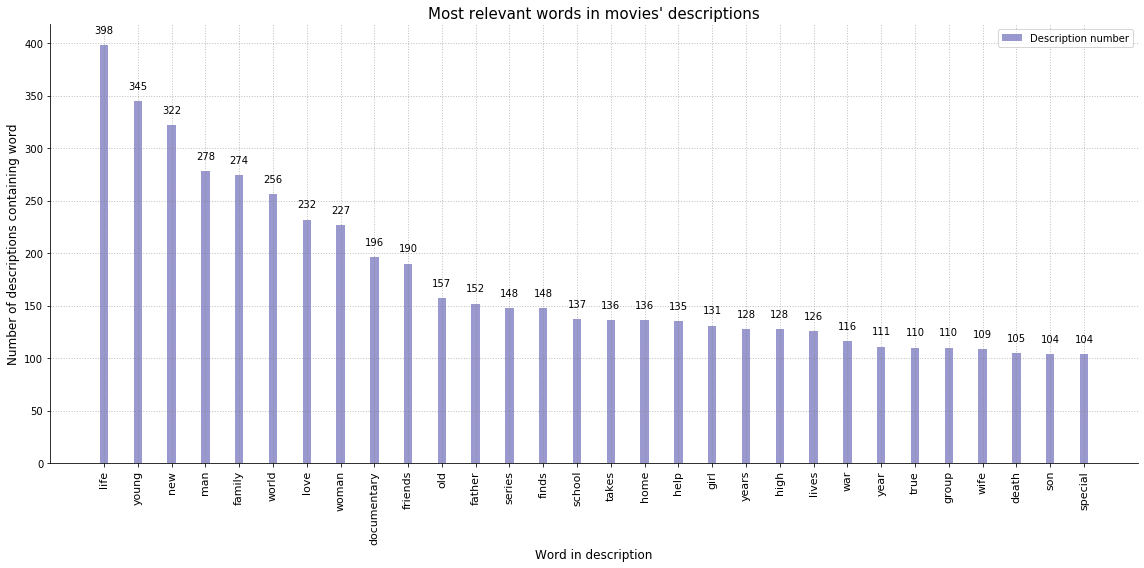

In [273]:
# visualizing results
N = 30  # N first rows sorted in descending order

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),  # 10 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

labels = df.index[:N]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(16, 8, forward=True)
fig.gca().spines['top'].set_visible(False)
fig.gca().spines['right'].set_visible(False)

fig.gca().set_xlabel('Word in description', fontsize=12)
fig.gca().set_ylabel('Number of descriptions containing word')

ax.grid(b=True, color='gray', alpha=0.5, linestyle='dotted', linewidth=1)

movie_rect = ax.bar(x, df['contains_in'][:N], 
                    width, label='Description number', color='darkblue', alpha=0.4)

ax.set_ylabel('Number of descriptions containing word', fontsize=12)
ax.set_title('Most relevant words in movies\' descriptions', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11, rotation=90)
ax.legend()

autolabel(movie_rect)

fig.tight_layout()
plt.legend()
plt.show()

In [274]:
RemoveDir('./tmp_descr/movie')
df = None
data = None
text = None

The conclusion is based on the technique to analyze term frequency for descriptions of Netflix Movies. The list of top words above means that probably we can find in Netflix movies which plot is about __life, world, love, friends, documentary, woman__.

### Description analysis for TV Shows
Doing the same for TV Shows.

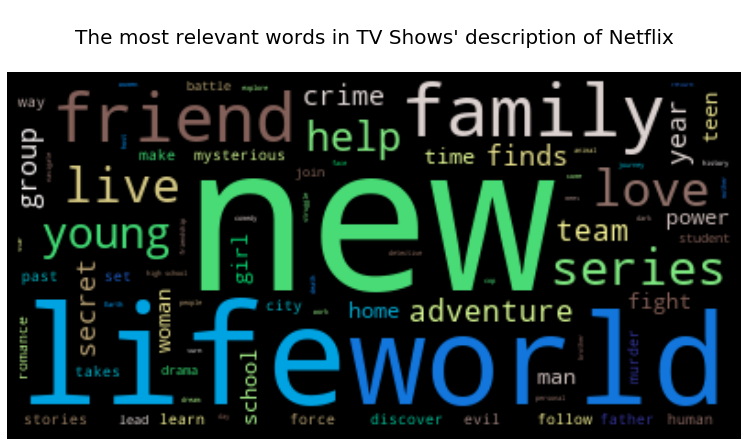

In [275]:
data = nt_df[nt_df.type=='TV Show']['description'].values
text = str().join(data)

wordcloud = WordCloud(background_color='black', 
                      colormap='terrain_r', stopwords=stopwords, margin=10).generate(text)

fig, ax = plt.subplots()
fig.set_size_inches(16, 6, forward=True)
    
plt.axis('off')
plt.title("\nThe most relevant words in TV Shows' description of Netflix\n", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)

plt.show()

The wordcloud for TV Shows establishes the list of top 50 words in descriptions. So, the most relevant and commmon are, for example __life, series, man, family, friend, live, adventure, team__. Top list of 10 words sorted in descending order by weights is performed in the table below.

In [276]:
_dir = './tmp_descr/tv'
RemoveDir(_dir)
os.makedirs(_dir)

In [277]:
# generating files
fname_list = []
for i in range(len(nt_df[nt_df.type == 'TV Show'])):
    row = nt_df.iloc[i]
    fname = _dir + "/" + str(row["show_id"]) + ".txt"
    fname_list.append(fname)
    text_file = open(fname, "w", encoding="utf-8")
    text_file.write(row["description"])
    text_file.close()

In [278]:
df = description_scoring(fname_list)
df[['score', 'contains_in']][:10]

C:\Users\Ildar Mukhamedjanov\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,score,contains_in
word,,
life,1.000000,196
new,0.845407,158
young,0.865012,155
family,0.767818,131
man,0.777804,129
world,0.682681,121
love,0.720809,118
woman,0.693513,112
friends,0.650335,107


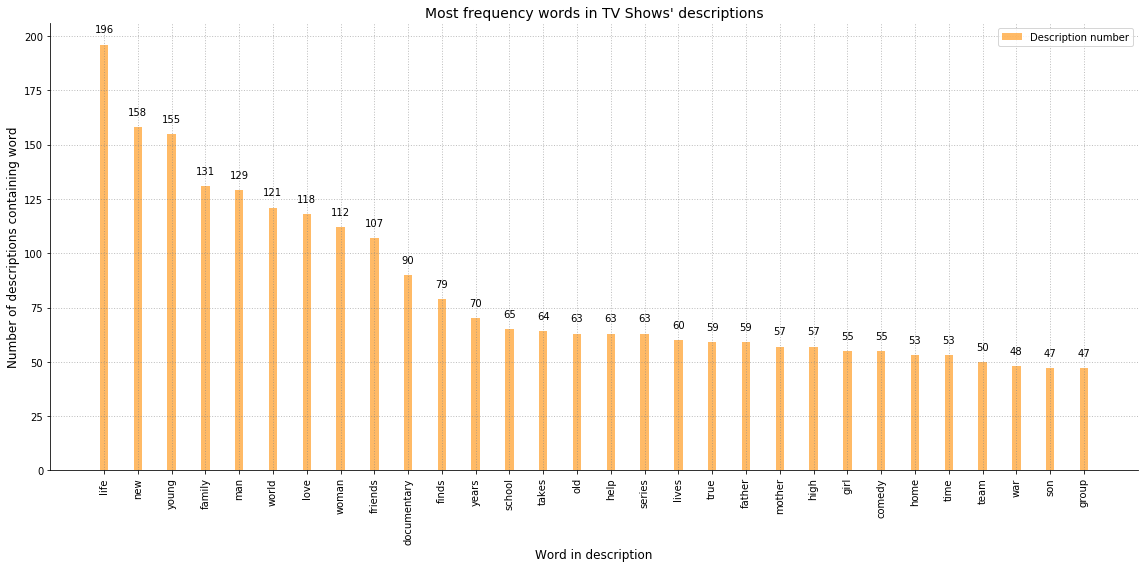

In [279]:
# visualizing results
N = 30  # N first rows sorted in descending order

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),  # 10 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

labels = df.index[:N]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(16, 8, forward=True)
fig.gca().spines['top'].set_visible(False)
fig.gca().spines['right'].set_visible(False)

fig.gca().set_xlabel('Word in description', fontsize=12)
fig.gca().set_ylabel('Number of descriptions containing word')

ax.grid(b=True, color='gray', alpha=0.5, linestyle='dotted', linewidth=1)

tv_rect = ax.bar(x, df['contains_in'][:N], 
                    width, label='Description number', color='darkorange', alpha=0.6)

ax.set_ylabel('Number of descriptions containing word', fontsize=12)
ax.set_title('Most frequency words in TV Shows\' descriptions', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=10, rotation=90)
ax.legend()

autolabel(tv_rect)

fig.tight_layout()
plt.legend()
plt.show()

High weight the word __series__ tells that most of TV Shows have a number of seasons, probably are everyday and include such issues as __life, friends, love, woman, life__.

In [280]:
RemoveDir('./tmp_descr')
os.rmdir('./tmp_descr')
df = None
data = None

## Genre analysis

The key issue here is to find how much content refers to a certain genre.

In [287]:
genre_df = nt_df.copy()

genres_set = set()
genres_list = genre_df.listed_in.unique()

for g_list in genres_list:
    for item in g_list.split(','):
        item = item.strip()
        if len(item) > 0:
            genres_set.add(item)
print("Unique genres number: ", genres_set.__len__())

Unique genres number:  42


__Let's check how many TV Shows and Movie are there in Netflix for every genre.__

In [334]:
genre_df = pd.DataFrame(columns=list(['genre']) +  nt_df.type.unique().tolist())
genre_df['genre'] = list(genres_set)
genre_df.head()

,genre,Movie,TV Show
0,Classic Movies,NaN,NaN
1,Spanish-Language TV Shows,NaN,NaN
2,International TV Shows,NaN,NaN
3,Dramas,NaN,NaN
4,Stand-Up Comedy & Talk Shows,NaN,NaN


In [335]:
for genre in genre_df.genre.tolist():
    for t in nt_df.type.unique().tolist():
        mask = (nt_df.listed_in.str.contains(genre)) & (nt_df['type'] == t)
        genre_df.loc[genre_df.genre==genre, [t]] = len(nt_df[mask])

In [336]:
# considering Movie genres
movie_df = genre_df[genre_df['TV Show'] == 0][['genre', 'Movie']]

# we need it as we have genre 'Movies' - it sums with the rest genres having 'Movies' as a substring
movie_df.loc[movie_df['genre'] == 'Movies', ['Movie']] = len(nt_df[nt_df.listed_in=='Movies'])

movie_df = movie_df.set_index('genre')
movie_df = movie_df.sort_values(by=['Movie'], ascending=False)
movie_df.head()

,Movie
genre,
International Movies,1927
Documentaries,668
Independent Movies,552
Children & Family Movies,378
Romantic Movies,376


In [337]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),  # 10 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

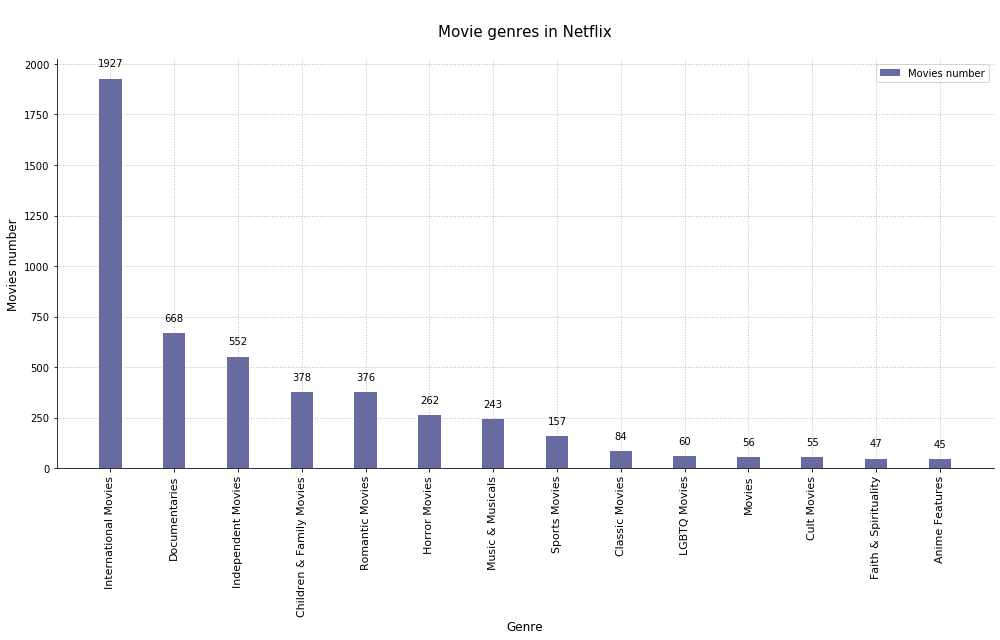

In [338]:
# visualizing results
labels = movie_df.index

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(14, 9, forward=True)
fig.gca().spines['top'].set_visible(False)
fig.gca().spines['right'].set_visible(False)

fig.gca().set_xlabel('Genre', fontsize=12)
fig.gca().set_ylabel('Movies number')

ax.grid(b=True, color='gray', alpha=0.5, linestyle='dotted', linewidth=1)

movie_rect = ax.bar(x, movie_df['Movie'], width, label='Movies number', 
                    color='xkcd:darkblue', alpha=0.6)

ax.set_ylabel('Movies number', fontsize=12)
ax.set_title('\nMovie genres in Netflix\n', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11, rotation=90)
ax.legend()

autolabel(movie_rect)

fig.tight_layout()
plt.legend()
plt.show()

In [339]:
tv_df = genre_df[genre_df['Movie'] == 0][['genre', 'TV Show']]

# we need it as we have genre 'Movies' - it sums with the rest genres having 'Movies' as a substring
tv_df.loc[tv_df['genre'] == 'TV Shows', ['TV Show']] = len(nt_df[nt_df.listed_in=='TV Shows'])

tv_df = tv_df.set_index('genre')
tv_df = tv_df.sort_values(by=['TV Show'], ascending=False)
# tv_df.head()

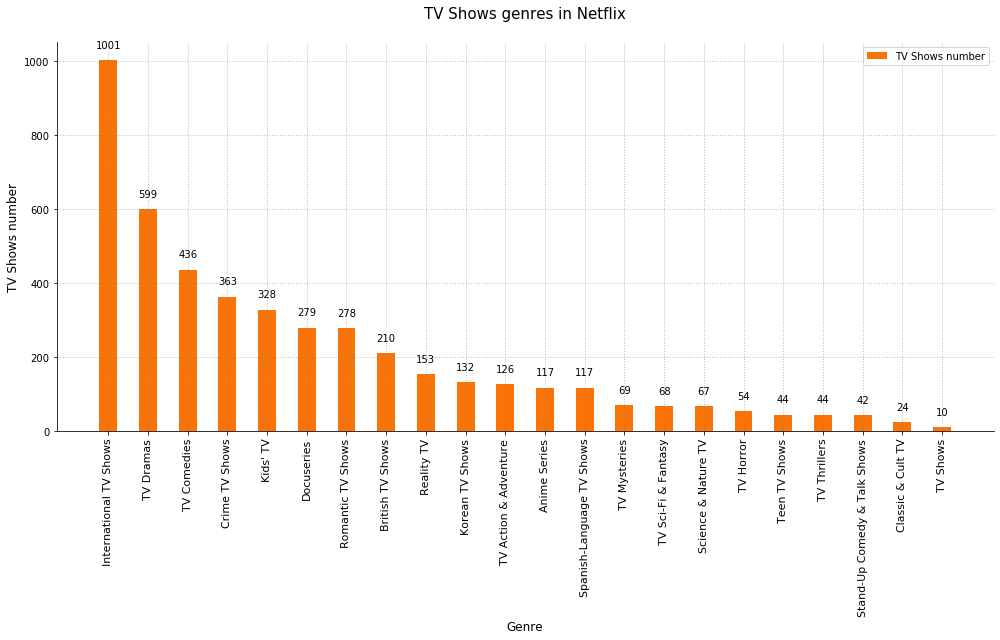

In [340]:
# visualizing results

labels = tv_df.index

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(14, 9, forward=True)
fig.gca().spines['top'].set_visible(False)
fig.gca().spines['right'].set_visible(False)

fig.gca().set_xlabel('Genre', fontsize=12)
fig.gca().set_ylabel('TV Shows number')

ax.grid(b=True, color='gray', alpha=0.5, linestyle='dotted', linewidth=1)

tv_rect = ax.bar(x, tv_df['TV Show'], 
                 width, label='TV Shows number', color='xkcd:orange')

ax.set_ylabel('TV Shows number', fontsize=12)
ax.set_title('TV Shows genres in Netflix\n', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11, rotation=90)
ax.legend()

autolabel(tv_rect)

fig.tight_layout()
plt.legend()
plt.show()